<a href="https://colab.research.google.com/github/ap12798/Applied_Deep_Learning/blob/main/Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Applied Deep Learning Project will be to determine the stock trend of Deere (stock abrev DE) for the beginning of 2021. The notebook will make use of the library yfinance to access Deere's beginning day stock price for the past 10 years.  

In [1]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 21.8 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=87851a602c2af7b915094cd64b46f6f4ec3903162f0c3a78534be62485111529
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import time
import yfinance as yf

In [4]:
data_train = yf.download("DE", start="2010-01-01", end="2020-12-31") # defaults to one price per day
data_test = yf.download("DE", start="2021-01-01", end="2021-05-31")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
data_train.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,54.740002,56.200001,54.340000,56.060001,43.838268,3974600
2010-01-05,56.189999,56.560001,55.599998,55.849998,43.674049,3007400
2010-01-06,55.570000,56.040001,55.220001,55.700001,43.556759,2854500
2010-01-07,55.380001,56.130001,55.169998,56.099998,43.869537,2694000
2010-01-08,55.779999,57.750000,55.299999,57.630001,45.065994,4165500


In [5]:
data_train.shape, data_test.shape

((2768, 6), (102, 6))

In [6]:
train_set = data_train.iloc[:, 1:2].values #grabbing just the stock open price
test_set = data_test.iloc[:, 1:2].values

In [44]:
train_set

array([[ 56.20000076],
       [ 56.56000137],
       [ 56.04000092],
       ...,
       [273.55999756],
       [269.54000854],
       [268.35998535]])

In [7]:
train_set.shape, test_set.shape

((2768, 1), (102, 1))

In [8]:
train_set

array([[ 56.20000076],
       [ 56.56000137],
       [ 56.04000092],
       ...,
       [273.55999756],
       [269.54000854],
       [268.35998535]])

In [9]:
# normalizing the test data
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [10]:
train_set_scaled

array([[0.02699316],
       [0.0286047 ],
       [0.02627693],
       ...,
       [1.        ],
       [0.98200462],
       [0.97672227]])

In [ ]:
# timestep of 60 and 1 output, so using the previous 60 days to help understand what happens the 61st day

In [11]:
X_train = []
y_train = []
for i in range(60, 2768):
  X_train.append(train_set_scaled[i-60:i, 0])
  y_train.append(train_set_scaled[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [12]:
# reshaping the data
X_train.shape

(2708, 60)

In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [ ]:
X_train.shape

(2708, 60, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [30]:
# hyperparameters
dropout = 0.2
neurons = 128
epochs = 16 # tried 50 and mean square error didn't do much after 16
batch_size = 32
optimizer = 'adam'
loss = 'mean_squared_error'

In [31]:
model = Sequential()
model.add(LSTM(units = neurons, return_sequences = True, input_shape = (X_train.shape[1], 1)))
# model.add(LSTM(X_train.shape[2],input_shape = (X_train.shape[1],X_train.shape[2]),return_sequences = True,
                   # activation = 'relu')) for multivariate
model.add(Dropout(dropout))
model.add(LSTM(units = neurons, return_sequences = True))
model.add(Dropout(dropout))
model.add(LSTM(units = neurons, return_sequences = True))
model.add(Dropout(dropout))
model.add(LSTM(units = neurons))
model.add(Dropout(dropout))
model.add(Dense(1))

In [32]:
model.compile(optimizer = optimizer, loss = loss)

In [33]:
model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/16
85/85 [==============================] - 23s 204ms/step - loss: 0.0187
Epoch 2/16
85/85 [==============================] - 17s 204ms/step - loss: 0.0014
Epoch 3/16
85/85 [==============================] - 17s 201ms/step - loss: 0.0012
Epoch 4/16
85/85 [==============================] - 18s 207ms/step - loss: 0.0014
Epoch 5/16
85/85 [==============================] - 17s 205ms/step - loss: 0.0012
Epoch 6/16
85/85 [==============================] - 17s 205ms/step - loss: 0.0011
Epoch 7/16
85/85 [==============================] - 18s 207ms/step - loss: 0.0011
Epoch 8/16
85/85 [==============================] - 17s 205ms/step - loss: 8.0567e-04
Epoch 9/16
85/85 [==============================] - 17s 203ms/step - loss: 9.4615e-04
Epoch 10/16
85/85 [==============================] - 17s 203ms/step - loss: 0.0010
Epoch 11/16
85/85 [==============================] - 17s 205ms/step - loss: 8.3805e-04
Epoch 12/16
85/85 [==============================] - 18s 209ms/step - loss: 7.6408e-

In [34]:
# need to get roughly 3 months (20 per month) 60 previous stock prices from the original data
# data_set_total = yf.download("DE", start = "2010-01-01", end = "2021-05-31")
# data_set_total = data_set_total['Open']

data_set_total = pd.concat((data_train['Open'], data_test['Open']), axis = 0)

In [35]:
data_test.shape

(102, 6)

In [36]:
inputs = data_set_total[len(data_set_total) - len(data_test) - 60:].values # using the previous 60 days to predict the 61st day
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs) # rnn is expecting this format
X_test = []
for i in range(60, 162): # 60 previous inputs + length of data_test
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1)) # 3D structure for input

In [37]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price) # going back from normalizing

In [38]:
predicted_stock_price.shape

(102, 1)

In [ ]:
test_set

In [24]:
data_test.shape

(102, 6)

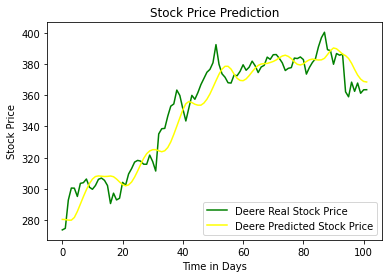

In [39]:
plt.plot(test_set, color = 'green', label = 'Deere Real Stock Price')
plt.plot(predicted_stock_price, color = 'yellow', label = 'Deere Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time in Days')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [29]:
predicted_stock_price[20], test_set[20] # with 64 neurons

(array([289.62225], dtype=float32), array([304.22000122]))

In [40]:
predicted_stock_price[20], test_set[20] # with 128 neurons

(array([302.81778], dtype=float32), array([304.22000122]))

In [41]:
predicted_stock_price[55], test_set[55] # with 128 neurons

(array([378.5379], dtype=float32), array([368.]))